# Monte Carlo simulation on 2D Ising model

- Ruihao QIU -- qiuruihao@gmail.com

This is a simple excisise of 2D Ising model.


In [48]:
#----------------------------------------------------------------------#
#   Import modules
#----------------------------------------------------------------------#
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import matplotlib.patches as patches
from matplotlib.collections import PatchCollection
%matplotlib inline

#----------------------------------------------------------------------#
#   Monte Carlo simulation parameters
#----------------------------------------------------------------------#
SIZE = 20                          # MC size SIZE * SIZE
STEPS = 100000                     # MC steps
T = 1                              # MC temperature (unit: K)
J = 1.0                            # Heisenberg interaction parameter 
                                   # (unit: meV)

#----------------------------------------------------------------------#
#   Define a function myFloat transform myList to float
#----------------------------------------------------------------------#
def myFloat(myList):
    return map(float, myList)


#----------------------------------------------------------------------#
#   Check periodic boundary conditions 
#----------------------------------------------------------------------#
def bc(i):
    if i+1 > SIZE-1:
        return 0
    if i-1 < 0:
        return SIZE-1
    else:
        return i


#----------------------------------------------------------------------#
#   Calculate energy (nearest interations) 
#----------------------------------------------------------------------#
def energy(system, N, M):
    return -1 * system[N,M] * J * (system[bc(N-1), M]
                               + system[bc(N+1), M]
                               + system[N, bc(M-1)]
                               + system[N, bc(M+1)])


#----------------------------------------------------------------------#
#   Build the system
#----------------------------------------------------------------------#
def build_system():
    sys = np.random.randint(2,size=(SIZE,SIZE))
    sys[sys==0] = -1

    return sys

init_system = build_system()        # Initial spin order


#----------------------------------------------------------------------#
#   Monte carlo loops
#----------------------------------------------------------------------#
def MC_loop(T, init_system):
    system = init_system.copy()         # .copy() is a deep copy method, 
                                        # otherwise the 'init_system' will change when 'system' changes
#    f = open('mc_data', 'w')           # Spin order of each accepted MC step for visualization
    n_acpt = 0                          # Number of accepted MC steps

    for step, x in enumerate(range(STEPS)):
        M = np.random.randint(0,SIZE)
        N = np.random.randint(0,SIZE)

        E = -2. * energy(system, N, M)

        if E <= 0.:
            system[N,M] *= -1
#            np.savetxt(f,system,fmt='%3d')      # Save spin order for every accepted MC step for visualization
            n_acpt = n_acpt + 1

        elif np.exp(-1./T*E) > np.random.rand():
            system[N,M] *= -1
#            np.savetxt(f,system,fmt='%3d')
            n_acpt = n_acpt + 1
    return system, n_acpt
#    f.close()


final_system = MC_loop(T, init_system)[0]
n_acpt = MC_loop(T, init_system)[1]

#----------------------------------------------------------------------#
#   calculate average magnetization
#----------------------------------------------------------------------#
def ave_mag(system):
    return np.sum(np.sum(system, axis=0))*1.0/SIZE**2


#----------------------------------------------------------------------#
#   Monte carlo outputs
#----------------------------------------------------------------------#
def outputs():
    print '='*70
    print 'Number of accepted steps: {:6d}'.format(n_acpt)
    print 'Spin order of every MC step is save in file mc_data'
    print 'Average magnetization is {:4.2f}'.format(ave_mag(final_system))
    print '='*70,'\n'

    print '='*70
    print 'The initial spin order'
    print '='*70,'\n'
    print init_system,'\n'

    print '='*70
    print 'The final spinal order'
    print '='*70,'\n'
    print final_system,'\n'

outputs()

Number of accepted steps:   2882
Spin order of every MC step is save in file mc_data
Average magnetization is -1.00

The initial spin order

[[-1 -1 -1 -1 -1 -1  1  1  1 -1 -1  1  1  1 -1 -1 -1  1  1 -1]
 [ 1  1 -1  1 -1 -1 -1  1 -1  1  1  1 -1  1  1 -1  1 -1 -1 -1]
 [ 1 -1 -1 -1  1  1 -1 -1  1  1  1  1 -1 -1 -1  1 -1 -1 -1  1]
 [ 1 -1 -1 -1 -1 -1 -1 -1  1  1  1 -1  1  1  1  1 -1  1 -1 -1]
 [ 1 -1  1  1  1  1  1  1  1 -1 -1  1  1 -1 -1 -1  1  1 -1 -1]
 [-1  1 -1 -1 -1  1 -1  1 -1 -1 -1  1 -1  1  1  1  1  1 -1  1]
 [ 1 -1  1 -1  1  1  1 -1  1 -1 -1 -1 -1  1 -1 -1 -1 -1  1 -1]
 [ 1 -1  1  1  1 -1 -1  1  1 -1 -1  1  1 -1 -1 -1 -1  1  1  1]
 [-1  1 -1  1  1  1 -1  1  1 -1 -1 -1  1 -1 -1  1  1 -1  1 -1]
 [ 1 -1  1 -1  1 -1  1  1  1 -1 -1 -1  1 -1 -1  1  1 -1  1  1]
 [ 1  1 -1 -1  1 -1  1 -1 -1 -1  1 -1  1 -1 -1  1 -1  1  1  1]
 [ 1 -1  1 -1 -1 -1  1  1  1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1]
 [ 1 -1  1  1 -1 -1  1  1 -1  1  1 -1  1 -1 -1  1 -1 -1  1  1]
 [-1  1 -1 -1 -1 -1  1  1  1  1 -1 -1 -1

## Visualize the MC process

### Visualize spin configurations with vectors

In [9]:
#----------------------------------------------------------------------#
#   Plot arrow spin vectors
#----------------------------------------------------------------------#
fig, ax = plt.subplots()
plt.xlim(-1,SIZE)
plt.ylim(-1,SIZE)

X, Y = np.meshgrid(np.arange(0, SIZE), np.arange(0, SIZE))
U = 0
V = init_system[X,Y]
C = V

Q = plt.quiver(X, Y, U, V, C, cmap=plt.cm.seismic, pivot='middle')

f = open("mc_data","r")
out = [line.split() for line in f]
data = map(myFloat,out)
f.close()

def animate(i):
    U = 0
    V = data[i*SIZE:(i+1)*SIZE]
    C = V
    Q.set_UVC(U,V,C)
    return Q

ani = animation.FuncAnimation(fig, animate, interval=20)

## Save the animation as .mp4 or .gif file

#ani.save('2d_vector.mp4', writer="ffmpeg", fps=10, dpi=400)
#ani.save('2d_color.gif', writer="imagemagick", fps=10)
#plt.show()

<img src="data-and-images/2d_vector.gif">

### Visualize spin configurations with colored squares

In [10]:
#----------------------------------------------------------------------#
#   Plot color field
#----------------------------------------------------------------------#

fig, ax = plt.subplots()
plt.xlim(0,SIZE)
plt.ylim(0,SIZE)

X, Y = np.meshgrid(np.arange(0, SIZE), np.arange(0, SIZE))
C = init_system[X, Y]

patches = []
for i in range(SIZE):
    for j in range(SIZE):
        a = plt.Rectangle((X[i, j], Y[i, j]), 1.0, 1.0, ec='none')
        patches.append(a)

colors = C.reshape(1,-1)[0]
p = PatchCollection(patches, cmap=plt.cm.seismic)
p.set_array(np.array(colors))
ax.add_collection(p)

f = open("mc_data","r")
out = [line.split() for line in f]
data = map(myFloat,out)
f.close()

def animate(i):
    C = np.asarray(data[i*SIZE:(i+1)*SIZE])
    colors = C.reshape(1,-1)[0]
    p.set_array(np.array(colors))
    return p

ani = animation.FuncAnimation(fig, animate, interval=10, save_count=n_acpt)
#ani.save('2d_color.gif', writer="imagemagick", fps=10)
#plt.show()


<img src="data-and-images/2d_color.gif">

### Estimate the phase tranisition temperature

In [53]:
#----------------------------------------------------------------------#
#   Temperature vs. Magnetization
#----------------------------------------------------------------------#
Mag = []; Temp = [];
for i in range(20,1,-1):
    T = i*1.0/2
    Temp.append(T)
    final_system = MC_loop(T, init_system)[0]
    Mag.append(abs(ave_mag(final_system)))
    init_system = final_system.copy()
print 'The average magnetization from 10K~1K:'
print Mag

The average magnetization from 10K~1K:
[0.080000000000000002, 0.050000000000000003, 0.01, 0.040000000000000001, 0.0, 0.14000000000000001, 0.0, 0.0, 0.11, 0.059999999999999998, 0.044999999999999998, 0.050000000000000003, 0.025000000000000001, 0.26000000000000001, 0.014999999999999999, 0.19, 0.87, 0.98999999999999999, 1.0]


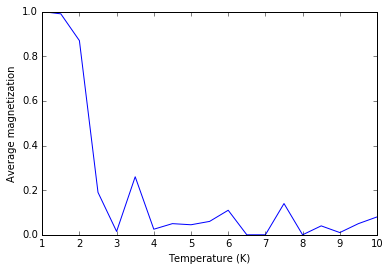

In [56]:
plt.plot(Temp, Mag)
plt.xlabel('Temperature (K)')
plt.ylabel('Average magnetization')
plt.show()

The phase transition temperature is around 2~3 K, since this is a very coarse example. The model can be improved by the following ways: 

- Obtain the accurate Heisenberg parameter J from first principles calculation.
- Consider more interations from second or third nearest neighbors.
- Increase the size of the model, expand to 3D model.

In the 3D Ising model, I will make the above improvements.